# 数据科学介绍1.1.1： Exploratory Data Analysis，探索性数据分析 

在我们开始之前，我们先了解一下数据科学，机器学习到底是要做什么事情，
有哪些基本概念。之后我们要学习一种不需要任何建模，
就可以对我们的数据有一定了解的方法，就是Exploratory Data Analysis（EDA）。

![](2020-03-24-18-01-07.png)

## 什么是数据（Data）

数据是个很广的概念，在数据科学里面我们一般认为数据是信息的一种表示方法。
**数据一般是通过观测获取的，一套数值的、定性或者定量的描述某一个东西的变量。**
比如，“他长得好帅”，这个就不是一个很好的数据，如果说，
“他的颜值系数=7000”，或者说“他的颜值属于超帅这个等级”这些就是数据了。
但是如果你说“我猜小丽肯定喜欢他”这个也不是数据，因为这个不是观测得到了。

## 样本 Sample

说到数据有个十分重要的概念，就是**样本**。
刚刚说数据是通过观测得到的，这个观测的过程也可以叫做采样，
就是Sampling。每**一次Sampling过程，也就是每次观测得到的结果就叫做样本。**
采样是统计学里面的技巧，也有很多种方法来保证你获取的样本代表整体
（population）的规律我们这里就不讲了。

我们的数据可以认为就是样本的集合，如下面的表格，
是病人的基本信息和十年内中风的概率。每一行，就是一个样本。
而每一列代表的就是一个描述这个样本的变量，我们就把它叫做特征。
有时候除了特征，样本里面还会有标签，这个标签，
一般就是我们未来需要预测的变量。

![](2020-03-21-12-32-21.png)

## 数据科学的基本套路

![](2020-03-21-12-27-12.png)

数据科学的套路基本就如上图，首先我们收集数据，也就是采样，
然后我们把这些数据整理一下，因为数据里面可能有很多我们用不上的特征或者
是搞错了的样本。然后再把这些干净的数据送到一个算法里面，他可以帮我们用这些
数据建立一个模型，这个过程叫做**训练，train**也可以
叫做 **Fit or Estimate**。当我们得到满意的模型了，然后把新收集到的数据给
这个模型，他就能给我们一些关于这个数据的结论，比如预测未来，或者对奇怪的东西
进行分类，这个过程叫做**预测，predict**，也可以
叫做**inference， forecast**。

## 数据的种类

刚刚说了什么是数据，就是对一个东西定性或者定量描述的变量。
他有很多类型，我们这里简单介绍一下：

### 类型数据与连续数据

**类型数据，Categorical data**：  
类型数据，就是他是有限取值的，只有几个有限的类型，
比如性别，只有男和女，最多还有个不男不女，但是没有70%男这种说法。
类型数据还分为**Nominal**和**Ordinal**，两种。Nominal就是种类是没有顺序的，
比如，刚刚说的性别，男，女，不存在先后。但是**Ordinal**是有顺序的，
例如，成绩分为 A，B，C，三等，那么A就是比B和C要成绩好，而B是比C好，比A差。

**连续数据，Continuous data**：  
连续数据就是，和他名字说的一样，他的取值有无限多种可能，
它分为两种，**Interval**和**Ratio**。Interval的意思就，
不太好解释，你可以理解为就是一个数值，没有绝对0点，但是有绝对的单位。
就是假设，Trump智商60，艾因斯坦智商120，我智商180，
那么爱因斯坦比Trump聪明多少我就比爱因斯坦聪明多少，
但你不能说我比Trump聪明3倍，因为，没有绝对0值。
而Ratio和Interval没啥区别，但是他有绝对的0点，比如20%就是10%的2倍。

## Exploratory Data Analysis（EDA）

EDA是一种初步的，不需要建立任何模型就可以让我们对我们的数据建立初步的认识，
找到总体的规律。通常EDA是通过数据可视化的方法完成的，就是画图。

通过EDA我们可以大概的知道我们数据有什么特性，
这能帮助我们后面更有效地建立模型，有时候甚至能直接得到很多有用的规律，
得到比模型更有用的信息。

我们下面导入一个1985年汽车大全的数据做一下EDA试试。

### 描述性统计

我们首先看哪些变量属于哪些类型。
可以看到里面很多是interval类型的变量，
比如length，width，horsepower。然后有些例如make，
就是牌子，他是nominal类型的变量，然后horsepower-binned，
是马力大小的分类，这个就是ordinal的数据。

对于interval的变量，这个很简单，大家都知道，
对于一个连续数据我们想知道他大概是个什么特性我们可以用最简单的几个变量描述，
平均值、中位值、范围、还有Variability。

我们可以读取那个数据文件到一个Dataframe里面，
然后运行`df.describe()`这个指令，得到一个数据的基本描述，
里面有一些有用的东西。

In [1]:
# 读取数据文件
import pandas as pd

df = pd.read_csv('auto_clean.csv')
df.head()

c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
# 数据描述性统计
# describe()方法可以对数据进行描述性统计，默认只对numerical的数据进行统计
# 如果想看全部类型的数据，可以传个参数进去`include='all'`
df_describe = df.describe()  
df_describe


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [3]:
# 某个属性的描述（价格）
df_describe.price


count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

通过上面的指令就可以看到汽车价格的范围(Max，Min)，Q1(25%)， 
中位数(50%)， Q3(75%)，以及平均值和标准差，
标准差可以表示数据分布是比较松散还是集中。不过这还不是很直观，
我们可以用box plot来visualize一下。

{'whiskers': [<matplotlib.lines.Line2D at 0x28553dc7550>,
 'caps': [<matplotlib.lines.Line2D at 0x28553dc7c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28553dc71f0>],
 'medians': [<matplotlib.lines.Line2D at 0x28553dd5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28553dd5670>],
 'means': []}

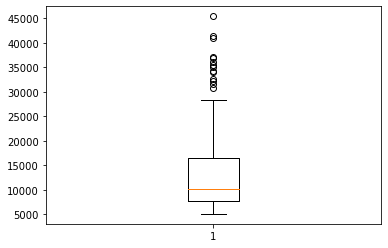

In [4]:
# Visualization ———— Boxplot
from matplotlib import pyplot as plt

plt.boxplot(df.price)
#plt.show()


这个图里面中间的线是中位值，也就是50%的值，
然后数据按照大小和数量分为4块（Q1~Q4），
方框是-+25%的值，就是25%，75%。最外面两条线就是正常数据上下限。
但是不含异常值（outlier）。在上下线以外的就是异常值，
小于Q1上限1.5倍Q3-Q1（IQR），或者大于Q4下限1.5倍IQR。

这样大概可以看出一些数据的分布，也就是可以了解一下variability，
可以看到高端车真的是很贵很贵，比普通车贵的多。

如果想进一步了解他的分布，可以画出直方图：

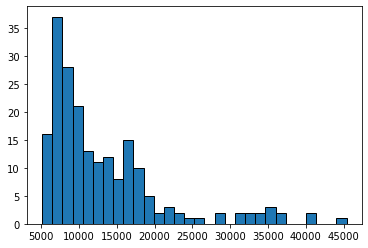

In [5]:
# Visualization ———— Histogram

plt.hist(df.price, bins=30, edgecolor='black')
# bins为直方图柱个数，edgecolor为直方图边缘颜色
plt.show()

刚刚我们讲的是连续数据，对于类型数据，我们可以用bar chart 
或者pie chart来看看。

例如我们想看看车子有哪些body style，例如掀背车、旅行车、敞篷车这些。

<BarContainer object of 5 artists>

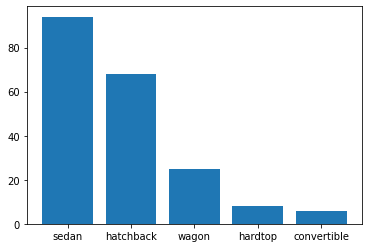

In [6]:
# Visualization ———— Categorical
body_style = df['body-style'].value_counts()  # 利用value_counts()统计每个种类的数量

# plt.bar()至少需要传2个参数，x是每个bar对应的坐标，
# height是每个bar的高度，这里body_style.index存放了种类
plt.bar(x=body_style.index, height=body_style)
#plt.show()

([<matplotlib.patches.Wedge at 0x28553ec5310>,
 [Text(0.11156107488731425, 1.094328162193584, 'sedan'),
  Text(-0.717981534407327, -0.8333681756883331, 'hatchback'),
  Text(0.7436771404398876, -0.8105210119343926, 'wagon'),
  Text(1.0466921353833576, -0.33828327438202915, 'hardtop'),
  Text(1.0951665671883726, -0.10300577708476373, 'convertible')],
 [Text(0.06085149539308049, 0.5969062702874094, '46.8%'),
  Text(-0.39162629149490563, -0.4545644594663635, '33.8%'),
  Text(0.40564207660357504, -0.4421023701460323, '12.4%'),
  Text(0.5709229829363768, -0.18451814966292496, '4.0%'),
  Text(0.5973635821027486, -0.05618496931896203, '3.0%')])

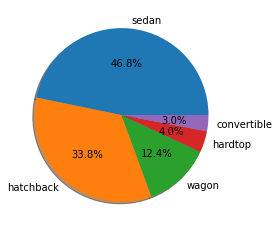

In [7]:
# plt.bar()原则上只必要传递x一个参数，但这样图里没有信息，因此还需要其他参数
# autopct是饼图中显示数字的格式，可以传递str或者callable的function
# labels就是饼图中的种类
# shadows加个阴影，纯粹为了好看
plt.pie(body_style, autopct='%1.1f%%', labels=body_style.index, shadow=True)
#plt.show()

大部分的车都是轿车。

这个对大部分Categorical数据，包括nominal和ordinary都是有效的。

### 多个变量间的关系

刚刚只看了一个变量，但是数据之间是有联系的，
那我们想看多个变量的关系怎么办呢？

**连续变量**

首先对于两个都是连续变量的话就用“相关图”就可以了，
他就是把两个变量分别画在x，y轴上看联系，这个大家都会，
例如下面，马力和售价的关系：

可以看出来马力越大的车子价格也越贵。


Text(0, 0.5, 'price')

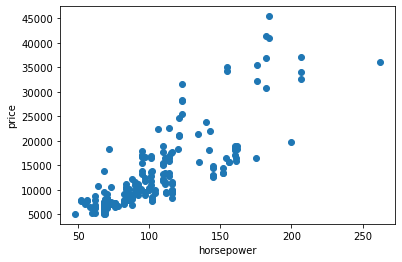

In [8]:
# Visualization ———— Scatter
plt.scatter(df.horsepower, df.price)
plt.xlabel('horsepower')
plt.ylabel('price')
#plt.show()

我们可以用correlation plot画出来多个变量之间的关系矩阵：

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

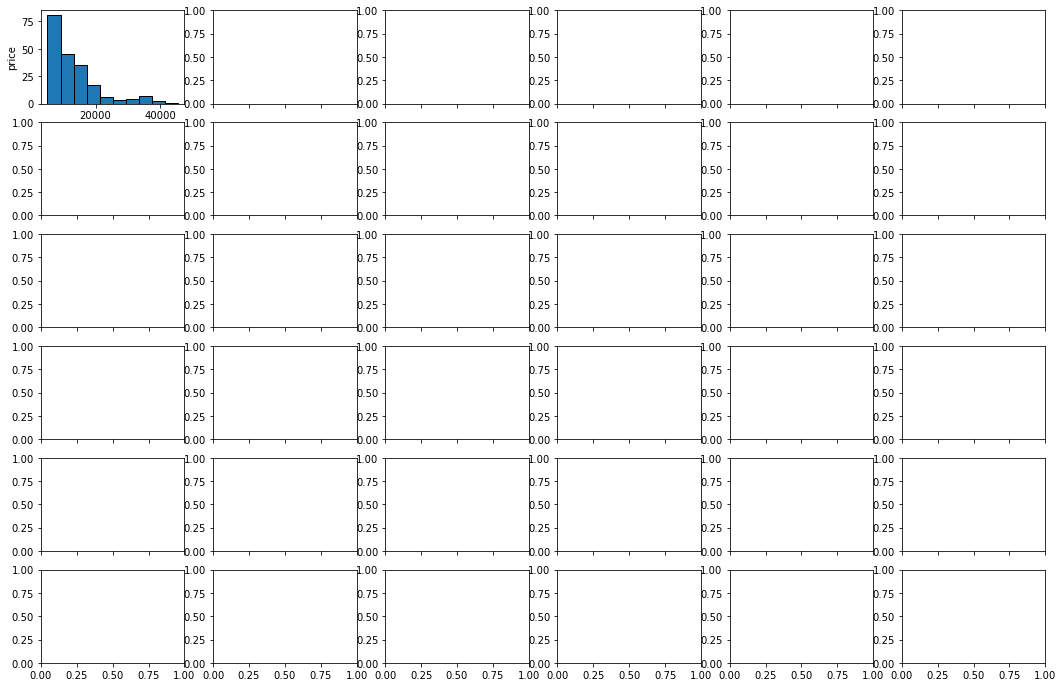

In [9]:
# Correlation plot
corr_df = df[['price', 'highway-mpg', 'curb-weight', 'horsepower', 'length', 'width']]
from corr_plot import corr_plot
corr_plot(corr_df, 12, 18)


上面有一句`from corr_plot import corr_plot`，
是助教小哥自己写的， 大家做EDA的时候不要做这种浮夸的事情。
助教为什么要写这个呢，是因为matlab里画这个图只要一行，
而python里找不到直接调包能够实现的接口，
大家可以画一点点类似的东西，就比较简单了，比如：

,price,highway-mpg,curb-weight,horsepower,length,width
price,1.000000,-0.704692,0.834415,0.809575,0.690628,0.751265
highway-mpg,-0.704692,1.000000,-0.794889,-0.804575,-0.698142,-0.680635
curb-weight,0.834415,-0.794889,1.000000,0.757976,0.880665,0.866201
horsepower,0.809575,-0.804575,0.757976,1.000000,0.579821,0.615077
length,0.690628,-0.698142,0.880665,0.579821,1.000000,0.857170
width,0.751265,-0.680635,0.866201,0.615077,0.857170,1.000000


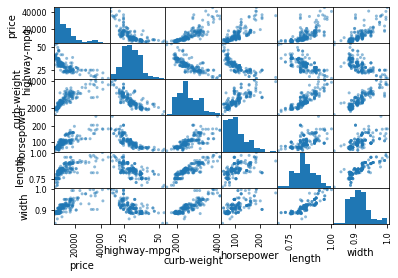

In [10]:
# Correlation plot ———— easy
corr_df = df[['price', 'highway-mpg', 'curb-weight', 'horsepower', 'length', 'width']]
pd.plotting.scatter_matrix(corr_df)
corr_df.corr()

其实能看到的内容是差不多的，区别在于助教画的图好看一点点，
图上加了个系数，加了根线，没了

所以大家做EDA的时候能用两行解决尽量用两行解决

~~或者可以找助教写点东西~~

再来看一眼上面那个图

上面这个图，是对角线对称的，对角线上，
是自己和自己的关系，肯定是1没有任何意义，
他就画了直方图代替。可以看出他给出了相关系数。
你可以看出那两个之间有关系是正相关还是负相关。
越接近于1越相关。我们可以看到我选的这几个变量之间还是挺相关的，例如越费油的车越贵，越重的车越贵，还有显然的，越宽越长的车越重。

**类型变量**

那如果是两个类型变量呢？怎么看关系？
这个就得用Contingency Table，它
用来展示两个类型变量之间的交叉的关系。举个例子，
我们的数据里面有这些车是什么牌子的，
和他是前轮还是后轮驱动的。
我们对这两个变量做一个contingency table就可以知道，
这些牌子，有多少前轮或者后轮驱动的车了。

<AxesSubplot:xlabel='make', ylabel='drive-wheels'>

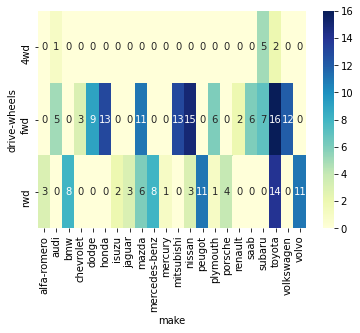

In [11]:
# cross_tab就是用来做Contingency Table的，传递的参数分别就是两个类型变量
contingency_table = pd.crosstab(df['drive-wheels'], df['make'])
# 这里我们用seaborn来画heatmap，我们来对比下seaborn和matplotlib的区别
import seaborn as sns
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')

看用seaborn就只要1行，如果我们用matplotlib会发生什么事呢？

[]

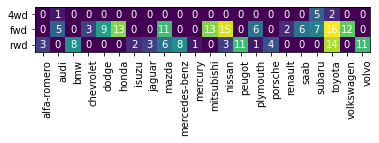

In [12]:
import numpy as np
# 这里因为要调整轴和表格中的字，必须要用面向对象的方法来写，这里我们创建一个ax的实例
fig, ax = plt.subplots()
ax.imshow(contingency_table)  # 这里就是一个裸图，是的只有图，没有坐标轴也没有数字
# 向图里添加数字
for row in range(contingency_table.shape[0]):
    for column in range(contingency_table.shape[1]):
        text = ax.text(column, row, contingency_table.iloc[row, column],
                       ha="center", va="center", color="w")
# 添加坐标轴的刻度
ax.set_xticks(np.arange(contingency_table.shape[1]))
ax.set_yticks(np.arange(contingency_table.shape[0]))
# 每个刻度对应的类型
ax.set_xticklabels(contingency_table.columns)
ax.set_yticklabels(contingency_table.index)
# 把x轴的刻度转90度，否则默认是水平的都挤在一起特别难看
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.plot()


可以看到matplotlib写了半天出来效果可能还没有seaborn一行好看。

matplotlib的优势在于你想画什么图都是可以画出来的

~~只要你写的够仔细...~~

我们可以看出honda，大众这些人民的品牌，全是前轮驱动的车，而宝马、奔驰这种土豪车牌子，全部都是后轮驱动的车。而4驱车只有奥迪和Subaru还有丰田（🤣）在做，这个表情很有意思吧。

**类型变量和连续变量间的关系**

这个时候我们就又要回到box plot了。例如我们想看看各种类型的车，他的售价怎么分布的？

<AxesSubplot:xlabel='body-style', ylabel='price'>

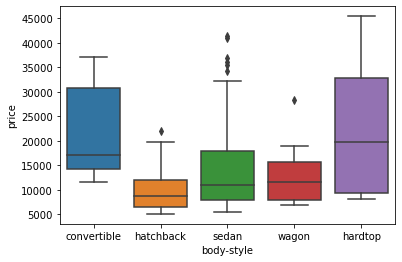

In [13]:
sns.boxplot(x=df['body-style'], y=df['price'])

可以看到敞篷车可以买到很贵，而掀背车，就是golf，AE86这些，就是便宜货。

ok，EDA就讲这么多，其实还有很多好玩的东西尤其是数据可视化。

大家还可以看看这些介绍：

https://www.kaggle.com/fazilbtopal/exploratory-data-analysis-with-python/data
